In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import json
import nltk
import wordcloud
import spacy

In [2]:
base_path = "/datapool/chris/ITA_DATA/ITA_WS_2020/"

df = pd.read_csv(base_path + "datasets/recipenlg/full_dataset.csv", index_col=0)

def convert(column_string):
    result = json.loads(column_string)
    if result:
        return result 
    return np.nan

# convert all the strings to lists in
for column in ["ingredients", "directions", "NER"]:
    df[column] = df[column].apply(convert)

df.head()

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit..."
1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup..."
2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow..."
3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou..."
4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,..."


In [3]:
print(f"Number of recipes before dropna: {len(df)}")
df.dropna(inplace=True, subset=["directions", "ingredients"])
print(f"Number of recipes after dropna: {len(df)}")

Number of recipes before dropna: 2231142
Number of recipes after dropna: 2231142


## Ingredients

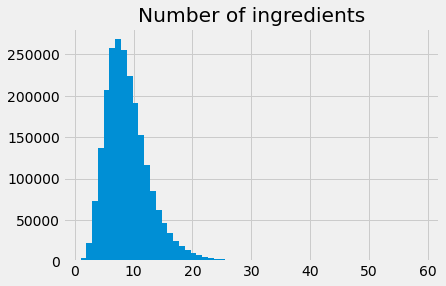

Median number of ingredients: 8.0
Std. deviation of number of ingredients: 4.00


In [4]:
def count_ingredients(ingredients):
    if isinstance(ingredients, list):
        return len(ingredients)
    else:
        return 0

df['n_ingredients'] = df.ingredients.apply(count_ingredients)

# remove all recipies with more than 60 ingredients
df = df[df.n_ingredients < 60]

# plot distribution
plt.title("Number of ingredients")
plt.hist(df.n_ingredients.tolist(), bins=max(df.n_ingredients.tolist()))
plt.show()

print(f"Median number of ingredients: {df.n_ingredients.median()}")
print(f"Std. deviation of number of ingredients: {df.n_ingredients.std():.2f}")

In [5]:
display(df.nlargest(10, 'n_ingredients'))

,title,ingredients,directions,link,source,NER,n_ingredients
1777625,Reuben Dog,"[6 Pastrami Dogs, recipe follows, 6 tablespoon...",[Preheat a flattop griddle or barbeque grill t...,www.foodnetwork.com/recipes/adam-gertler/reube...,Recipes1M,"[follows, butter, gruyere, beef short rib meat...",59
2161111,Red Curry Marinated Skirt Steak Fajitas,"[BBQ Rub, 3/4 cup ancho chile powder, 1/4 cup ...",[Combine all ingredients in a small bowl and s...,www.foodnetwork.com/recipes/red-curry-marinate...,Recipes1M,"[Rub, ancho chile powder, sweet paprika, orega...",59
1995202,Ahi Palette Dancer,"[50 wonton wrappers, 2 quarts oil, for frying,...","[Cut in triangle, and deep-fry in oil at 375 d...",www.foodnetwork.com/recipes/ahi-palette-dancer...,Recipes1M,"[wonton wrappers, oil, logs, Caribbean seasoni...",58
680387,Grilled Sweet Corn With Garlic Butter,"[6 Tbsp. butter, room temperature, 1 to 2 garl...",[Melt butter in a large saucepan over medium h...,www.cookbooks.com/Recipe-Details.aspx?id=872778,Gathered,"[butter, garlic, salt, parsley, olive oil, oni...",57
1720367,Oxtail and Black Bean Soup with Grilled Spiny ...,"[3 tablespoons olive oil, 2 pounds oxtails, 2 ...","[Set a large, 4-quart Dutch oven over medium h...",www.foodnetwork.com/recipes/emeril-lagasse/oxt...,Recipes1M,"[olive oil, oxtails, salt, freshly ground blac...",57
1945851,Barbecued Pulled Pork Sandwiches with Homemade...,"[1 boneless pork butt, about 4 pounds, 3 table...","[Place the pork in a baking dish., In a bowl, ...",www.foodnetwork.com/recipes/emeril-lagasse/bar...,Recipes1M,"[pork butt, dark brown sugar, salt, cumin, pap...",57
2117192,Life Burger,"[3 tablespoons honey or clear raw agave, 1/8 c...",[Combine the first 4 ingredients to a blender....,www.foodnetwork.com/recipes/life-burger-recipe...,Recipes1M,"[honey, olive oil, charged water, Non-GMO leci...",57
1743706,Pasticcio,"[Pie crust, recipe follows, Meatballs, recipe ...",[To assemble the Pasticcio: Preheat the oven t...,www.foodnetwork.com/recipes/mario-batali/pasti...,Recipes1M,"[Pie crust, Tortellini, bolognesi, Brown chick...",56
1936297,Hot and Hot Pork and Beans with Homemade Chow ...,"[2 pound pork shoulder, bone-in, Salt and pepp...","[Season pork shoulder with salt and pepper., B...",www.foodnetwork.com/recipes/hot-and-hot-pork-a...,Recipes1M,"[pork shoulder, Salt, Olive oil, white beans, ...",56
2223037,Backyard BBQ'd Spareribs,"[2 racks pork spareribs (about 3 pounds each),...",[Trim the membrane off the back of the ribs an...,www.foodnetwork.com/recipes/food-network-kitch...,Recipes1M,"[pork spareribs, Rub, wood chips, BBQ Sauce, s...",56


The median number of ingredients is 8, which seems plausible. There are some recipes that require a lot of ingredients, i.e. the distribution is long tailed. However, the majority has 1-22 ingredients. There are no recipes that require no ingredients since they would have been dropped above.

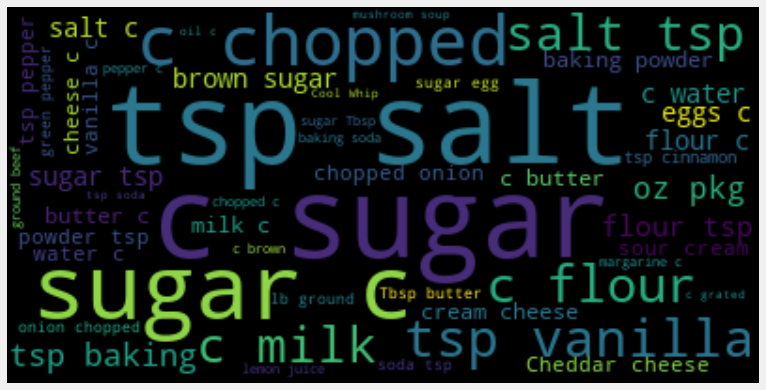

In [6]:
total_ingredients = nltk.flatten(df.head(100000).ingredients.tolist())
wc = wordcloud.WordCloud(max_words=50, max_font_size=60).generate(" ".join(total_ingredients))

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

As one can see, sugar is the most prominent ingredient. However, the ingredients include adjectives and measures (chopped, c (cup), tsp (teaspoon), oz, etc.). This needs to be cleaned to obtain the real ingredients.

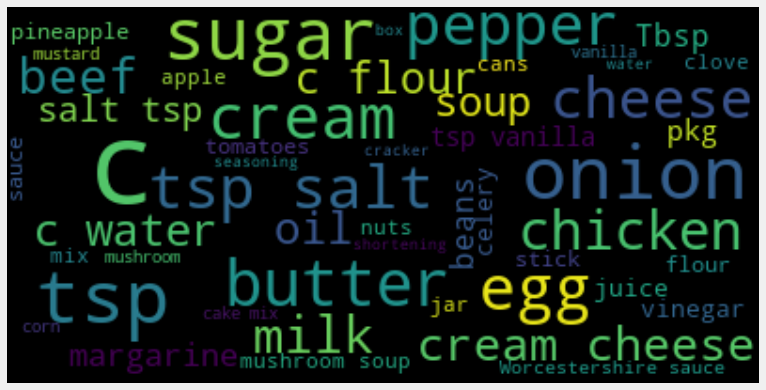

In [7]:
nlp = spacy.load("en_core_web_sm")
processed_ingredients = [nlp(text) for text in total_ingredients[:1000]]
nouns = [str(word) for ingredient in processed_ingredients for word in ingredient if word.pos_ == "NOUN"]
wc = wordcloud.WordCloud(max_words=50, max_font_size=60).generate(" ".join(nouns))

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

This looks better, but still cup is the most prominent word although it is a measure and not an ingredient. This probably has to be removed manually via a stopword list, tablespoon, teaspoon, pund, similarly. Interestingly words like vegetable are of course nouns but most likely appear in combination with stock for example where they are adjectives. This has to be taken care of. Why are lentils so prominent?

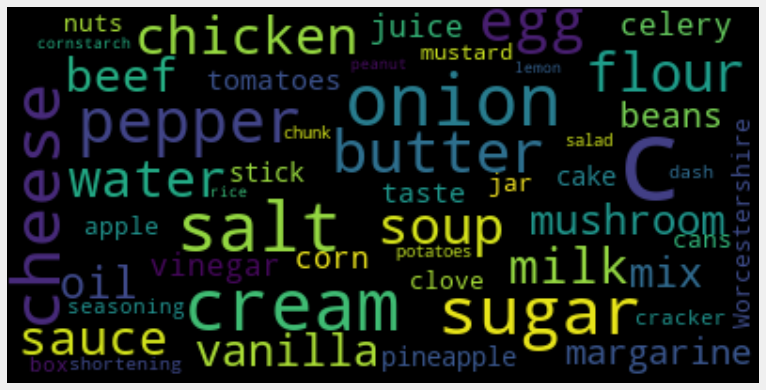

In [8]:
# without units (special stopwords)
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {
    "cup", "cups", "tablespoon", "tablespoons", "teaspoon", "teaspoons", "pound", 
    "pounds", "ounce", "ounces", "slice", "slices", "piece", "pieces", "c", "C", "tsp", "tbsp", "pkg"
}
processed_ingredients = [nlp(text) for text in total_ingredients[:1000]]
nouns = [str(word) for ingredient in processed_ingredients for word in ingredient if (word.pos_ == "NOUN" and not word.is_stop)]
wc = wordcloud.WordCloud(max_words=50, max_font_size=60, collocations=False).generate(" ".join(nouns))

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")


## Directions

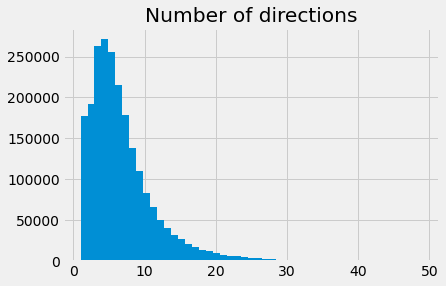

Median number of directions: 5.0
Std. deviation of number of directions: 5.13


In [24]:
def count_directions(directions):
    if isinstance(directions, list):
        return len(directions)
    else:
        return 0

df['n_directions'] = df.directions.apply(count_directions)

# remove all recipies with more than 60 ingredients
df = df[df.n_directions < 50]

# plot distribution
plt.title("Number of directions")
plt.hist(df.n_directions.tolist(), bins=max(df.n_directions.tolist()))
plt.show()

print(f"Median number of directions: {df.n_directions.median()}")
print(f"Std. deviation of number of directions: {df.n_directions.std():.2f}")

Interestingly, ther are quite a lot of recipes with only a few directions (i.e. simple recipes). Only a samll number of recipes have more than 10 directions.

In [10]:
recipes = df[df.n_directions <= 1]["directions"].head(10)

for recipe in recipes:
    print(recipe)

['In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.']
['Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.']
['Buy whole turkey breast; remove all skin and bones. Cut into pieces about the size of your hand. Pour marinade over turkey and refrigerate for at least 8 hours (up to 48 hours). The longer it marinates, the less cooking time it takes.']
['In a large skillet, brown the ground beef. Drain, stir in taco mix, kidney beans, and salsa. Bring to a boil. Reduce heat, and let simmer for about 5 minutes. Cut peppers in half and clean it. Put peppers in boiling w

Some recipies just seem to have very few instructions, but some of the recipies also did not get split up into instructions properly.

In [21]:
# number of words, sentences in directions 
processed_directions = [nlp(direction) for direction in nltk.flatten(df.directions.tolist()[:750]) if isinstance(direction, str)]
sentences_per_direction = [len(list(processed_direction.sents)) for processed_direction in processed_directions]

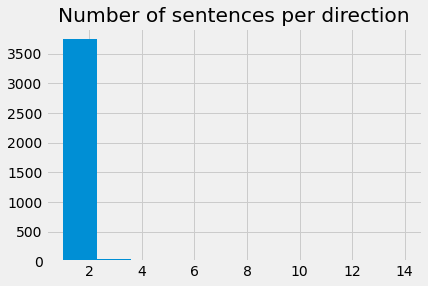

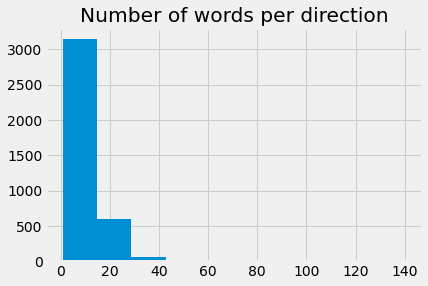

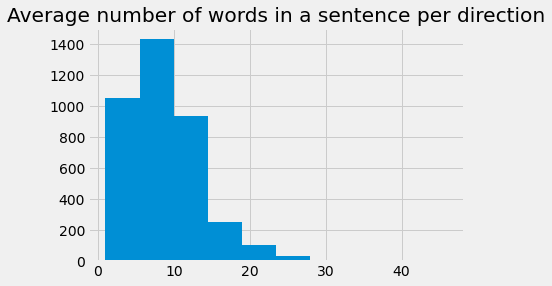

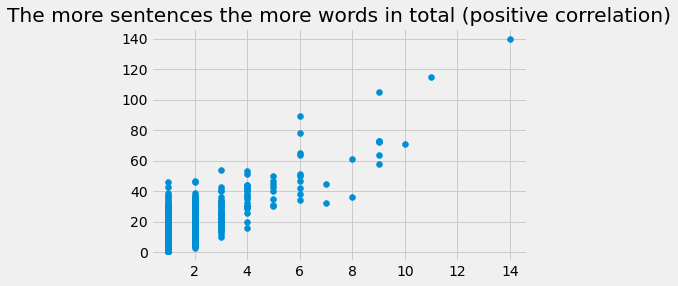

In [22]:
plt.title("Number of sentences per direction")
plt.hist(sentences_per_direction)
plt.show()

words_per_direction = [len(processed_direction) for processed_direction in processed_directions]
plt.title("Number of words per direction")
plt.hist(words_per_direction)
plt.show()

plt.title("Average number of words in a sentence per direction")
plt.hist(np.array(words_per_direction) / np.array(sentences_per_direction))
plt.show()

plt.title("The more sentences the more words in total (positive correlation)")
plt.scatter(sentences_per_direction, words_per_direction)
plt.show()

This is varying quite a lot! So there is no clue if the directions are especially long or short. Of course the correlation between #words and #sentences is positive. Interestingly it is more a cloud than a line, so some variation.